### New Years Resolution Analysis

- _Dataset from __Kaggle__: contains about 5000 tweets of New Years Resolutions_
- _Tweet dates range from 2014-12-21 to 2015-01-02_

In [48]:
# Importing the required libraries

import pandas as pd
import re
import string
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import seaborn as sns
import spacy
nlp = spacy.load('en_core_web_lg')

In [30]:
# Reading the dataset and understanding its dimensions

ny_resolutions = pd.read_csv('new_year_resolutions.csv', sep = ';')
ny_resolutions.shape

(5002, 14)

In [31]:
# Setting a custom index for the dataframe ('tweet_id') and selecting the relevant columns

ny_resolutions.set_index('tweet_id', inplace = True)
ny_resolutions = ny_resolutions[['gender', 'resolution_category', 'text']]
ny_resolutions.head()

,gender,resolution_category,text
tweet_id,,,
"5,50363E+17",female,Health & Fitness,"#NewYearsResolution :: Read more books, No scr..."
"5,50363E+17",female,Humor,#NewYearsResolution Finally master @ZJ10 's pa...
"5,50362E+17",male,Personal Growth,#NewYearsResolution to stop being so damn perf...
"5,50362E+17",male,Philanthropic,My #NewYearsResolution is to help my disabled ...
"5,50362E+17",female,Personal Growth,#NewYearsResolution #2015Goals #2015bucketlist...


---

Getting an overview of the data:

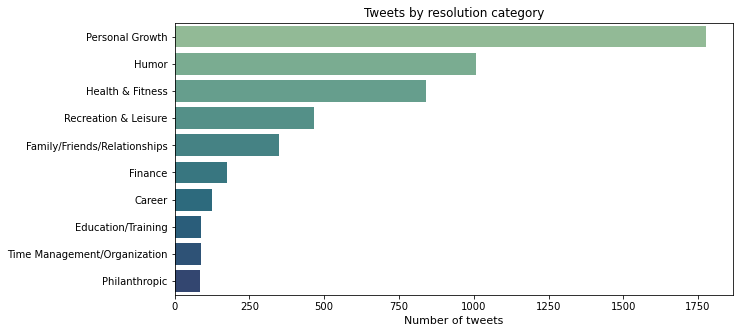

In [32]:
# Tweets by resolution category

plt.figure(figsize=(10,5))

sns.barplot(x = ny_resolutions['resolution_category'].value_counts().values, y = ny_resolutions['resolution_category'].value_counts().index, palette = 'crest')
plt.title('Tweets by resolution category')
plt.xlabel('Number of tweets', fontsize = 11)
plt.show()

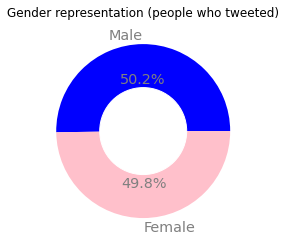

In [33]:
# Tweets by gender

plt.pie(ny_resolutions['gender'].value_counts(), labels = ['Male', 'Female'], colors = ['blue', 'pink'], autopct='%.1f%%', textprops={'color': 'grey', 'size': 'x-large'})

center_circle = plt.Circle((0,0), 0.5, color = 'white')
p = plt.gcf()
p.gca().add_artist(center_circle)
plt.title('Gender representation (people who tweeted)')
plt.show()

---

Let's start analysing the tweet's text (from this point on, the analysis will be based on the 'text' column):

In [34]:
# Creating a function to remove '#', 'RT', hyperlinks, @mentions, punctuations, and stop words

def cleanText(text):
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'@[a-zA-Z0-9]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

ny_resolutions['text'] = ny_resolutions['text'].apply(cleanText)
ny_resolutions['text'].head()

tweet_id
5,50363E+17    NewYearsResolution Read books No scrolling FBc...
5,50363E+17    NewYearsResolution Finally master part Kitchen...
5,50362E+17                    NewYearsResolution stop damn perf
5,50362E+17    My NewYearsResolution help disabled patients d...
5,50362E+17    NewYearsResolution 2015Goals 2015bucketlist co...
Name: text, dtype: object

---

Analysing the subjectivity and polarity of the tweet's text:
- __Subjectivity__ ranges from 0 to 1, with 0 being objective and 1 being subjective
- __Polarity__ ranges from -1 to 1, with -1 being negative and 1 being positive 

In [35]:
# Creating functions to determine the Subjectivity and Polarity and add them to the dataframe (creating new columns)

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

ny_resolutions['subjectivity'] = ny_resolutions['text'].apply(getSubjectivity)
ny_resolutions['polarity'] = ny_resolutions['text'].apply(getPolarity)

ny_resolutions.head()

,gender,resolution_category,text,subjectivity,polarity
tweet_id,,,,,
"5,50363E+17",female,Health & Fitness,NewYearsResolution Read books No scrolling FBc...,0.000000,0.0
"5,50363E+17",female,Humor,NewYearsResolution Finally master part Kitchen...,1.000000,0.0
"5,50362E+17",male,Personal Growth,NewYearsResolution stop damn perf,0.000000,0.0
"5,50362E+17",male,Philanthropic,My NewYearsResolution help disabled patients d...,0.510714,0.1
"5,50362E+17",female,Personal Growth,NewYearsResolution 2015Goals 2015bucketlist co...,0.000000,0.0


In [36]:
# Getting the sentiment associated with each tweet based on its polarity

def getSentiment(polarity):
    if polarity == 0:
        return 'Neutral'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Positive'
    
ny_resolutions['sentiment'] = ny_resolutions['polarity'].apply(getSentiment)
ny_resolutions.head()

,gender,resolution_category,text,subjectivity,polarity,sentiment
tweet_id,,,,,,
"5,50363E+17",female,Health & Fitness,NewYearsResolution Read books No scrolling FBc...,0.000000,0.0,Neutral
"5,50363E+17",female,Humor,NewYearsResolution Finally master part Kitchen...,1.000000,0.0,Neutral
"5,50362E+17",male,Personal Growth,NewYearsResolution stop damn perf,0.000000,0.0,Neutral
"5,50362E+17",male,Philanthropic,My NewYearsResolution help disabled patients d...,0.510714,0.1,Positive
"5,50362E+17",female,Personal Growth,NewYearsResolution 2015Goals 2015bucketlist co...,0.000000,0.0,Neutral


Positive    2529
Neutral     1699
Negative     774
Name: sentiment, dtype: int64


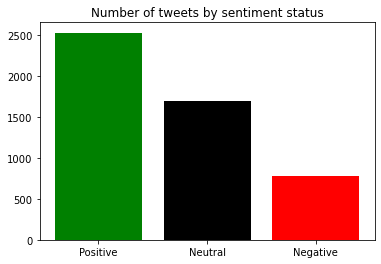

In [37]:
# Finding sentiment split and plotting its results

sentimentSplit = ny_resolutions['sentiment'].value_counts()
print(sentimentSplit)

x = sentimentSplit.index
h = sentimentSplit.values

c =[]
for i in x:
    if i == 'Positive':
        c.append('green')
    elif i == 'Neutral':
        c.append('black')
    else:
        c.append('red')

plt.bar(x, height = h, color = c)
plt.title('Number of tweets by sentiment status')
plt.show()

In [38]:
# Finding sentiment split (percentage)

sentimentPerc = round((sentimentSplit / ny_resolutions.shape[0]) * 100, 2)
sentimentPerc

Positive    50.56
Neutral     33.97
Negative    15.47
Name: sentiment, dtype: float64

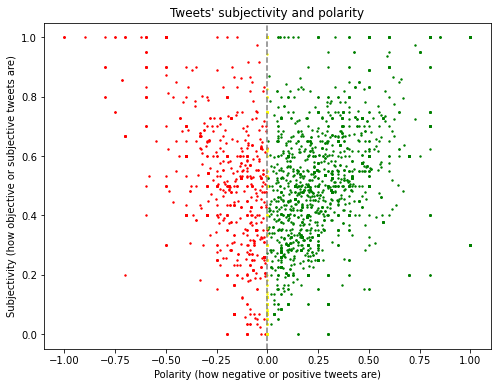

In [39]:
# Visualising tweets' subjectivity and polarity

plt.figure(figsize = (8,6))

for i in range(0, ny_resolutions.shape[0]):
    if ny_resolutions['sentiment'][i] == 'Positive':
        color = 'green'
    elif ny_resolutions['sentiment'][i] == 'Negative':
        color = 'red'
    else:
        color = 'yellow'
    plt.scatter(ny_resolutions['polarity'][i], ny_resolutions['subjectivity'][i], color = color, s = (2))

plt.title("Tweets' subjectivity and polarity")
plt.xlabel('Polarity (how negative or positive tweets are)')
plt.ylabel('Subjectivity (how objective or subjective tweets are)')
plt.axvline(0, color = 'grey', linestyle='--')
plt.show()

---

Analysing individual words:


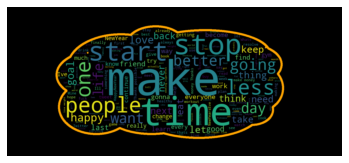

In [40]:
# Creating a word cloud to visualise the most commonly occurring words: for the purpose of this word cloud, let's remove the words in 'New Years Resolutions', which not surprisingly, are the most frequently occurring words

allTweets = ' '.join([text for text in ny_resolutions['text']]).split()
allTweets = [word for word in allTweets 
    if word.lower() not in('newyearsresolution', 'new', 'year', 'years', 'resolution', 'resolutions')]
allTweets = ' '.join(allTweets)

# Excluding specific words that don't add meaning to the word cloud
STOPWORDS.add('Im')  
STOPWORDS.add('go')  
STOPWORDS.add('amp')  
STOPWORDS.add('dont') 

# Setting a specific shape for th word cloud
custom_mask = np.array(Image.open('image_word_cloud.png'))

wordCloud = WordCloud(stopwords = STOPWORDS, mask = custom_mask, contour_color = 'orange', contour_width = 15, max_font_size = 200).generate(allTweets)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [41]:
# Finding the root of the words

root = SnowballStemmer(language = 'english')

root_word = []
for word in allTweets.split():
    root_word.append(root.stem(word))
    
root_word[:30]  # Showing only some of the root words (for simplicity)

['read',
 'book',
 'no',
 'scroll',
 'fbcheck',
 'email',
 'b4',
 'breakfast',
 'stay',
 'dedic',
 'ptyoga',
 'squash',
 'achin',
 'back',
 'final',
 'master',
 'part',
 'kitchen',
 'sink',
 'stop',
 'damn',
 'perf',
 'my',
 'help',
 'disabl',
 'patient',
 'discov',
 'emot',
 'physic',
 'therapi']

In [49]:
# Removing stopwords and some of the frequently occurring words that don't have meaning by itself

stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('get')
stopwords.append('go')
stopwords.append('im')
stopwords.append('amp')
stopwords.append('dont')
stopwords.append('1')
stopwords.append('let')
stopwords.append('tri')
stopwords.append('no')
stopwords.append('b4')

root_word_clean = []

for word in root_word:
    if word not in stopwords:
        root_word_clean.append(word)

root_word_clean[:30]  # Showing only some of the root words (for simplicity)

['read',
 'book',
 'scroll',
 'fbcheck',
 'email',
 'breakfast',
 'stay',
 'dedic',
 'ptyoga',
 'squash',
 'achin',
 'back',
 'final',
 'master',
 'part',
 'kitchen',
 'sink',
 'stop',
 'damn',
 'perf',
 'help',
 'disabl',
 'patient',
 'discov',
 'emot',
 'physic',
 'therapi',
 'love',
 'pet',
 'adoptarescu']

In [50]:
# Checking which are the top 20 most frequent root words

word_frequency = pd.value_counts(np.array(root_word_clean))
word_frequency = word_frequency.sort_values(ascending = False)[:20]
word_frequency

2015      747
make      387
stop      360
start     256
time      240
peopl     205
less      204
one       203
like      197
better    179
day       179
eat       178
life      166
want      147
happi     144
take      140
work      139
love      138
money     131
keep      126
dtype: int64

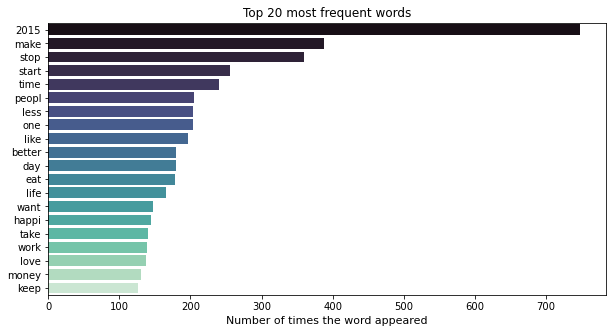

In [51]:
# Plotting the results above (top 20 most frequent words)

plt.figure(figsize=(10,5))

sns.barplot(x = word_frequency.values, y = word_frequency.index, palette = "mako")
plt.title('Top 20 most frequent words')
plt.xlabel('Number of times the word appeared', fontsize = 11)
plt.show()

Starting and stopping activities seemed to be among the top priorities in these resolutions for 2015. Understandably, time is also an area that people planned to focus on in the new year.

In [52]:
# Finding the categories to which the root words belong

root_word_stem = nlp(' '.join(root_word_clean))
label = [(X.text, X.label_) for X in root_word_stem.ents]
root_word_entity = pd.DataFrame(label, columns = ['word','entity'])
root_word_entity['entity'].value_counts()

DATE           952
CARDINAL       557
PERSON         487
ORG            245
TIME            70
GPE             68
ORDINAL         64
QUANTITY        51
NORP            48
PRODUCT         27
FAC              8
LOC              7
WORK_OF_ART      5
MONEY            4
EVENT            2
LANGUAGE         2
LAW              1
PERCENT          1
Name: entity, dtype: int64

---

References:
- https://www.youtube.com/watch?v=ujId4ipkBio&list=WL&index=2
- https://www.youtube.com/watch?v=MpIi4HtCiVk